In [96]:
import re
from posextract import grammatical_triples
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def count_constructions(clean_data):
    ngrams_dict = {}
    for ngram in clean_data:
        if ngram in ngrams_dict:
            ngrams_dict[ngram] += 1
        else:
            ngrams_dict[ngram] = 1
    return ngrams_dict


def find_subject_verb_pairs(extracted_triples, news_source):
    subject_verb_pairs = []
    for string in extracted_triples[news_source]:
        if not 'Not' in string:
            subject_verb_pairs.append(' '.join(string.split()[0:2]))
        else:
            subject_verb_pairs.append(' '.join(string.split()[0] + ' ' + string.split()[2]))

    return subject_verb_pairs


def vader_sentiment(text):
    return SentimentIntensityAnalyzer().polarity_scores(text)


def import_and_clean_data(path, news_source):
    fname = path + news_source + '_full_article_text_12-27-2021.txt'
    replace_dict = {'\n':'', '   ':'', 'Loading...':'', 'U.S.':'United States'}
  
    file = open(fname)
    lines = [line for line in file.readlines() if line.strip()] # do i want this if statement
    file.close()
  
    out = ' '.join(lines)
  
    for k, v in replace_dict.items():
      out = out.replace(k, v)
    
    return re.split('(?<=\.)(?=[A-Z])', out)
  

def extract_triples(path, news_sources, triples_dict, keyword_dict):
  
  for news_source in news_sources:

    clean_data = import_and_clean_data(path, news_source)

    triples = grammatical_triples.extract(clean_data)

    for elem in keyword_dict[news_source]:
      for triple in triples:
         if re.match(elem, str(triple), re.IGNORECASE):
          triples_dict[news_source].append(str(triple).title())

  return triples_dict

In [97]:
path = '/home/stephbuon/projects/entascope/data/12-27-2021/'
news_sources = ['FOX', 'NPR']
triples_dict = {news_sources[0]: [], news_sources[1]: []}
#people_dict = {'FOX': ['Trump', 'Biden'], 'NPR': ['Trump', 'Biden']}
people_dict = {'FOX': ['Biden', 'Trump', 'Fauci', 'Psaki', 'Blasio', 'Cuomo', 'Desantis', 'Newsom', 'Powell', 'Hochul','Mayorkas', 'Brown', 'Harris', 'Walensky', 'Harris', 'Siegel', 'Horak'], 
               'NPR': ['Biden', 'Collins', 'Fauci', 'Osterholm', 'Hochul', 'Chu', 'Kilgore', 'Walensky', 'Hochul', 'Tedros', 'Kerkhove', 'Blasio', 'Newsom', 'Austin', 'Kirby', 'Brown', 'Trump', 'Allie', 'Ghebreyesus', 'Dolsten', 'Mammen', 'Pollack', 'Ryan']}

extracted_triples = extract_triples(path, news_sources, triples_dict, people_dict)

In [98]:
subject_verb_pairs = find_subject_verb_pairs(extracted_triples, 'FOX')

subject_verb_count = count_constructions(subject_verb_pairs)

total_count = sum(subject_verb_count.values())

fox_count = ''
for k,v in subject_verb_count.items():
    if subject_verb_count['FOX']:
        


1069

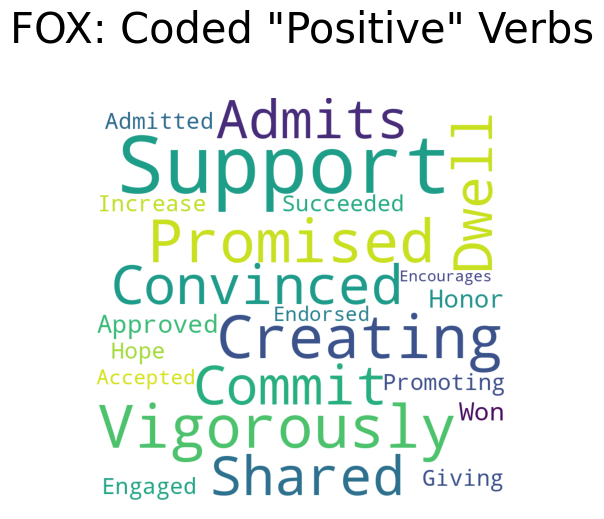

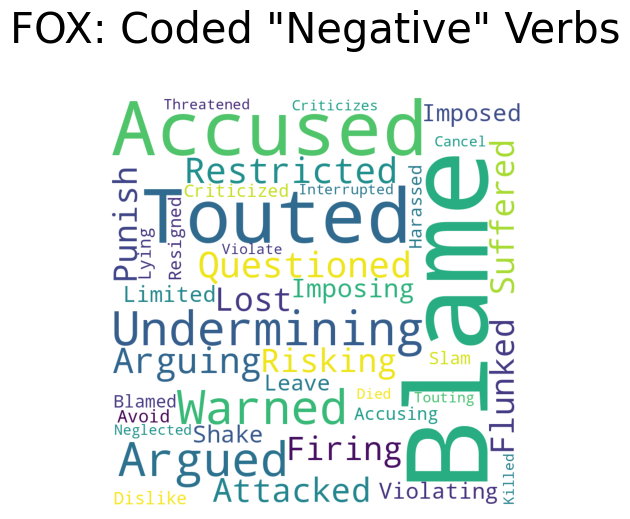

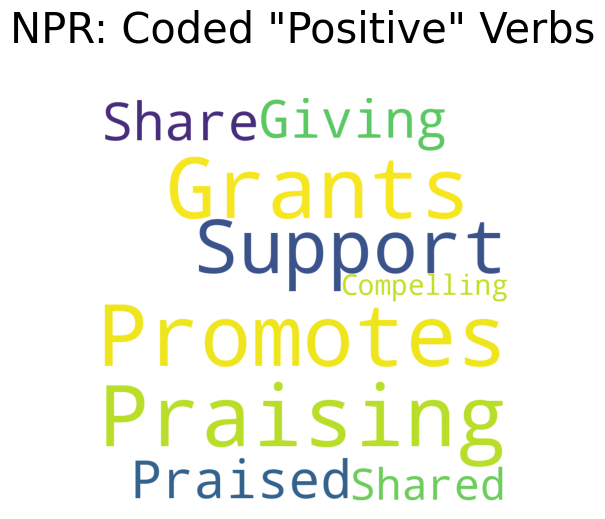

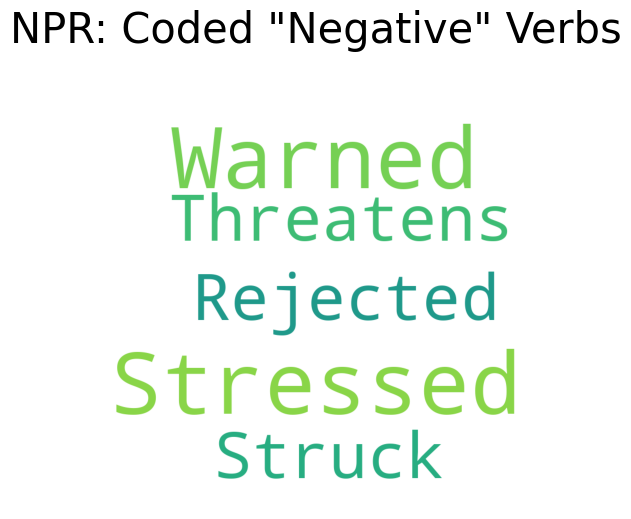

In [105]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
 
sent_types = ['pos', 'neg']

for news_source in news_sources:

    subject_verb_pairs = find_subject_verb_pairs(extracted_triples, news_source)

    subject_verb_count = count_constructions(subject_verb_pairs)

    for sent_type in sent_types:
        wc_words = ''
        for key, val in subject_verb_count.items():
            sentiment_tagged_words = vader_sentiment(key.split()[1])
    
            if sentiment_tagged_words[sent_type] == 1.0:
                wc_words += key.split()[1] + ' '
 
        wordcloud = WordCloud(width = 800, height = 800,
                        background_color ='white',
                        min_font_size = 10).generate(wc_words)
 
        plt.figure(figsize = (5, 5), facecolor = None)

        if sent_type == 'neg':
            title_sent_type = 'Coded \"Negative\"'
        elif sent_type == 'pos':
            title_sent_type = 'Coded \"Positive\"'

        plt.title(news_source + ': ' + title_sent_type + ' Verbs', fontsize = 30, pad = 40)
        plt.imshow(wordcloud)
        plt.axis('off')
        plt.tight_layout(pad = 0)
 
        plt.show()

In [ ]:
# what percentage is negative? FOX had 200 negative words out of 1000 words.